<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/The-Hundred-Page-Machine-Learninng-Book/blob/main/CNN(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
# Import the font_manager module from matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

훈련 데이터: (60000, 28, 28), 테스트 데이터: (10000, 28, 28)
Epoch 1/10
469/469 - 5s - 11ms/step - accuracy: 0.9406 - loss: 0.2026 - val_accuracy: 0.9821 - val_loss: 0.0575
Epoch 2/10
469/469 - 1s - 2ms/step - accuracy: 0.9826 - loss: 0.0558 - val_accuracy: 0.9877 - val_loss: 0.0395
Epoch 3/10
469/469 - 1s - 2ms/step - accuracy: 0.9880 - loss: 0.0394 - val_accuracy: 0.9906 - val_loss: 0.0310
Epoch 4/10
469/469 - 1s - 2ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9896 - val_loss: 0.0296
Epoch 5/10
469/469 - 1s - 2ms/step - accuracy: 0.9929 - loss: 0.0229 - val_accuracy: 0.9914 - val_loss: 0.0253
Epoch 6/10
469/469 - 1s - 2ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9907 - val_loss: 0.0288
Epoch 7/10
469/469 - 1s - 2ms/step - accuracy: 0.9953 - loss: 0.0145 - val_accuracy: 0.9899 - val_loss: 0.0317
Epoch 8/10
469/469 - 1s - 2ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9901 - val_loss: 0.0353
Epoch 9/10
469/469 - 1s - 2ms/step - accuracy: 0.9965 - loss:

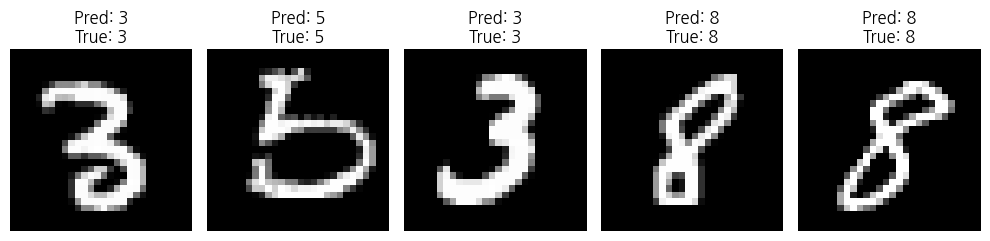

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# 1. MNIST 데이터셋 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 형태 출력 (확인용)
print(f"훈련 데이터: {X_train.shape}, 테스트 데이터: {X_test.shape}")

# 2. 데이터 전처리
# CNN 모델에 입력하기 위해 4차원 데이터로 변환: [samples, height, width, channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))  # (60000, 28, 28, 1)
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))  # (10000, 28, 28, 1)

# 입력 데이터 정규화 (0 ~ 255의 픽셀 값을 0 ~ 1로 변환)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 출력 데이터(레이블) 원-핫 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)  # 0 ~ 9 숫자에 대한 10개의 클래스
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 3. CNN 모델 구성
model = Sequential()

# 첫 번째 합성곱 층 (필터 32개, 3x3 크기의 커널)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# 최대 풀링 층 (풀링 크기 2x2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 두 번째 합성곱 층 (필터 64개, 3x3 크기의 커널)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# 두 번째 최대 풀링 층 (풀링 크기 2x2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 평탄화 레이어 (입력을 1차원 벡터로 변환)
model.add(Flatten())

# 완전 연결(Dense) 층 (128개의 뉴런)
model.add(Dense(128, activation='relu'))

# 출력 층 (0 ~ 9까지 10개의 클래스에 대한 출력)
model.add(Dense(10, activation='softmax'))

# 4. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=2, validation_data=(X_test, y_test))


# 6. 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\n테스트 정확도: {test_acc * 100:.2f}%")

# 7. 예측 시각화 (테스트 데이터 중 5개의 이미지를 예측하고 시각화)
num_images = 5
plt.figure(figsize=(10, 5))

for i in range(num_images):
    index = np.random.randint(0, X_test.shape[0])
    test_image = X_test[index].reshape(1, 28, 28, 1)
    predicted_label = np.argmax(model.predict(test_image), axis=1)
    true_label = np.argmax(y_test[index])

    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_label[0]}\nTrue: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()



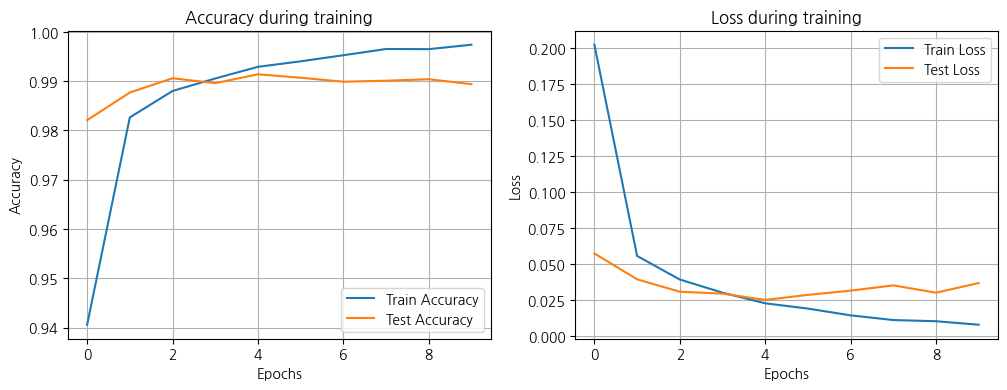

In [4]:
# 8. 학습 과정 시각화
# 정확도 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()